In [1]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Download MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [2]:
import torch
import torch.nn as nn
import torchquantum as tq
import torchvision
import torchvision.transforms as transforms

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define a custom quantum module with parameters
class QuantumLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(QuantumLayer, self).__init__()
        self.fc = nn.Linear(input_size, output_size)  # Simple linear layer as a placeholder

    def forward(self, x):
        # Apply some operations and return
        return self.fc(x)

# Define the quantum neural network model
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super(QuantumNeuralNetwork, self).__init__()
        self.q_layer1 = QuantumLayer(28*28, 128)  # Define custom quantum layer
        self.q_layer2 = QuantumLayer(128, 10)  # Define custom quantum layer

    def forward(self, x):
        x = self.q_layer1(x)
        x = torch.relu(x)  # Apply activation function
        x = self.q_layer2(x)
        return x

# Initialize the model, loss function, and optimizer
model = QuantumNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Train the model
for epoch in range(10):  # train for 10 epochs
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)  # flatten the images
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

accuracy = correct / len(test_loader.dataset)
print(f'Test Loss: {test_loss / len(test_loader)}')
print(f'Test Accuracy: {accuracy:.2f}%')


Epoch 1, Batch 1, Loss: 2.3121113777160645
Epoch 1, Batch 101, Loss: 0.1879710555076599
Epoch 1, Batch 201, Loss: 0.16956286132335663
Epoch 1, Batch 301, Loss: 0.3467309772968292
Epoch 1, Batch 401, Loss: 0.22436432540416718
Epoch 1, Batch 501, Loss: 0.2384798526763916
Epoch 1, Batch 601, Loss: 0.07882661372423172
Epoch 1, Batch 701, Loss: 0.10619392991065979
Epoch 1, Batch 801, Loss: 0.07533714175224304
Epoch 1, Batch 901, Loss: 0.3709355294704437
Epoch 2, Batch 1, Loss: 0.09775370359420776
Epoch 2, Batch 101, Loss: 0.1366259604692459
Epoch 2, Batch 201, Loss: 0.06527998298406601
Epoch 2, Batch 301, Loss: 0.12992826104164124
Epoch 2, Batch 401, Loss: 0.0757942646741867
Epoch 2, Batch 501, Loss: 0.054122719913721085
Epoch 2, Batch 601, Loss: 0.14672604203224182
Epoch 2, Batch 701, Loss: 0.0846133604645729
Epoch 2, Batch 801, Loss: 0.32051947712898254
Epoch 2, Batch 901, Loss: 0.11698686331510544
Epoch 3, Batch 1, Loss: 0.18923276662826538
Epoch 3, Batch 101, Loss: 0.015194394625723362


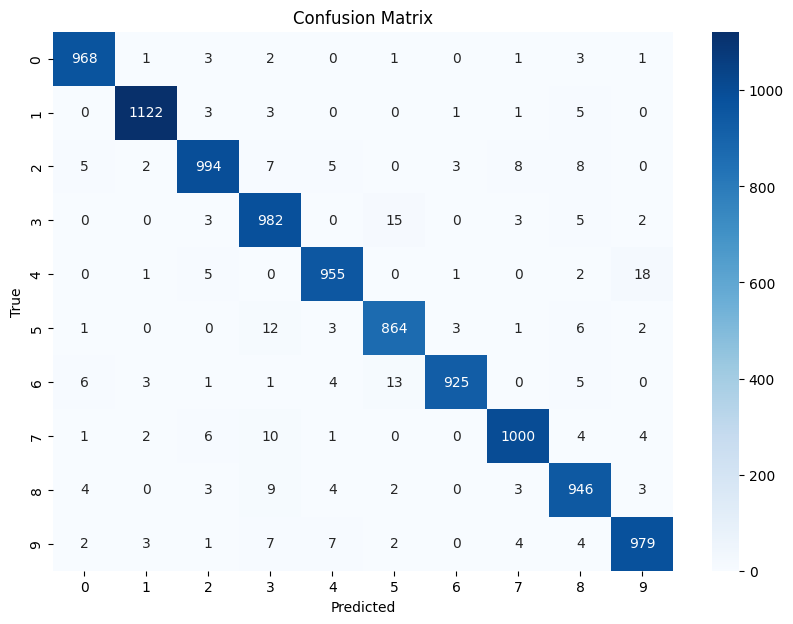

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have y_true and y_pred
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

plot_confusion_matrix(y_true, y_pred, classes=[str(i) for i in range(10)])


In [4]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)], output_dict=True)
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



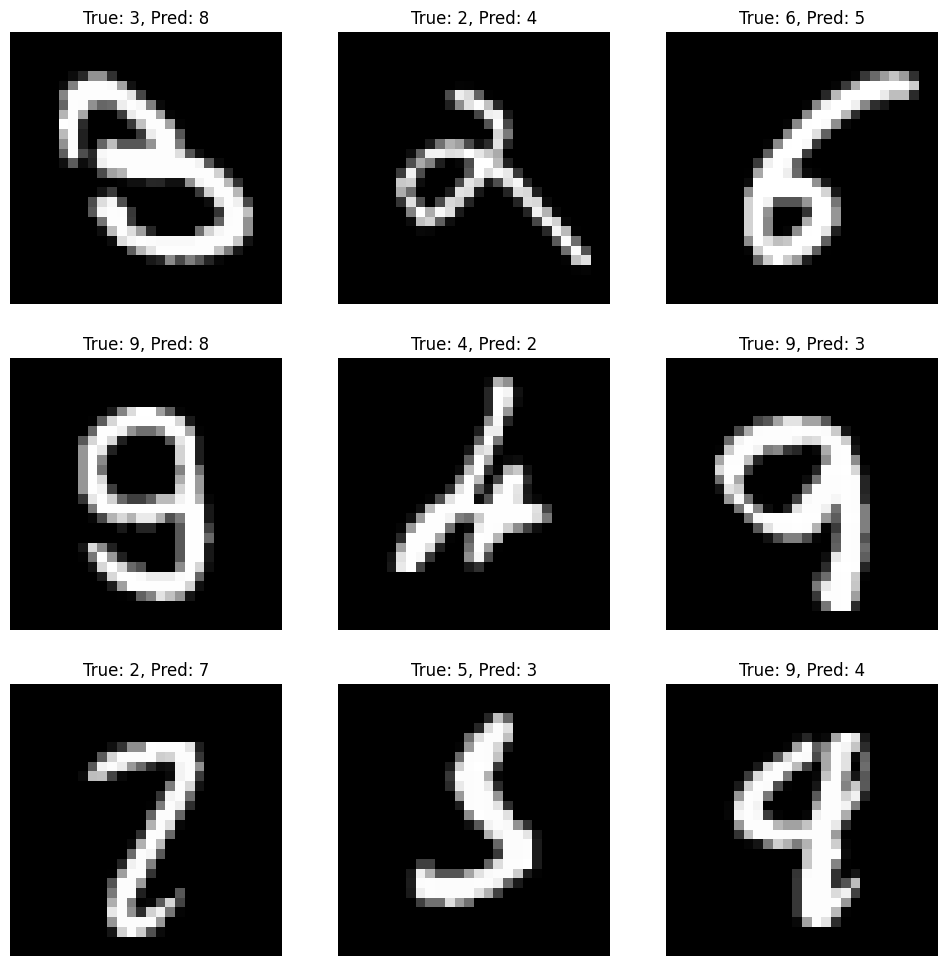

In [5]:
def plot_misclassified_examples(images, labels, predictions):
    misclassified_indices = [i for i in range(len(labels)) if labels[i] != predictions[i]]
    plt.figure(figsize=(12, 12))
    for i, index in enumerate(misclassified_indices[:9]):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[index].reshape(28, 28), cmap='gray')
        plt.title(f'True: {labels[index]}, Pred: {predictions[index]}')
        plt.axis('off')
    plt.show()

# Collect misclassified examples
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []
for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    for i in range(len(labels)):
        if labels[i] != predicted[i]:
            misclassified_images.append(images[i].cpu().numpy())
            misclassified_labels.append(labels[i].cpu().numpy())
            misclassified_predictions.append(predicted[i].cpu().numpy())

plot_misclassified_examples(misclassified_images, misclassified_labels, misclassified_predictions)


In [6]:
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train and evaluate a classical model
simple_nn = SimpleNN()
optimizer = torch.optim.Adam(simple_nn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop for classical model (similar to QNN training loop)

# Evaluation loop for classical model
simple_nn.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = simple_nn(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

accuracy = correct / len(test_loader.dataset)
print(f'Classical Model Test Loss: {test_loss / len(test_loader)}')
print(f'Classical Model Test Accuracy: {accuracy:.2f}%')


Classical Model Test Loss: 2.312156993112746
Classical Model Test Accuracy: 0.08%
